In [1]:
import numpy as np

from src.VMSI import *
from src.segment import Segmenter
import skimage
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import seaborn as sns

## Run VMSI pipeline against synthetically generated images

### One-step processing and inference

In [2]:
# Load example image
img_test = skimage.io.imread('./Images/benchmark_size_images/18.tiff')

# Without tiling
no_tiling = run_VMSI(img_test, is_labelled=True, tile=False, verbose=False, optimiser='matlab')

# With tiling (tiling is automatically switched on)
tiling = run_VMSI(img_test, is_labelled=True, verbose=False, optimiser='nlopt')

##### Plot results

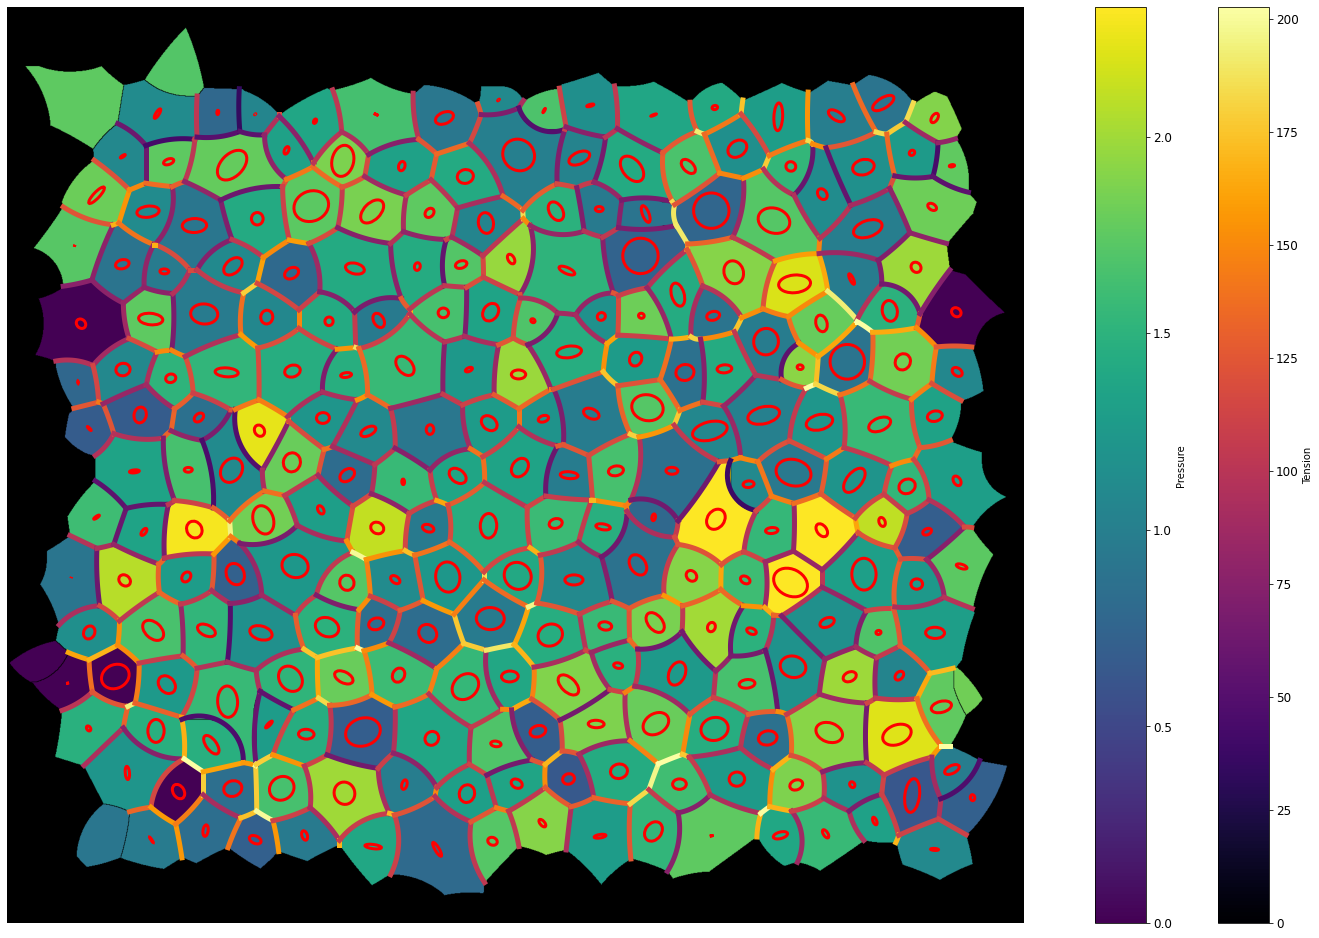

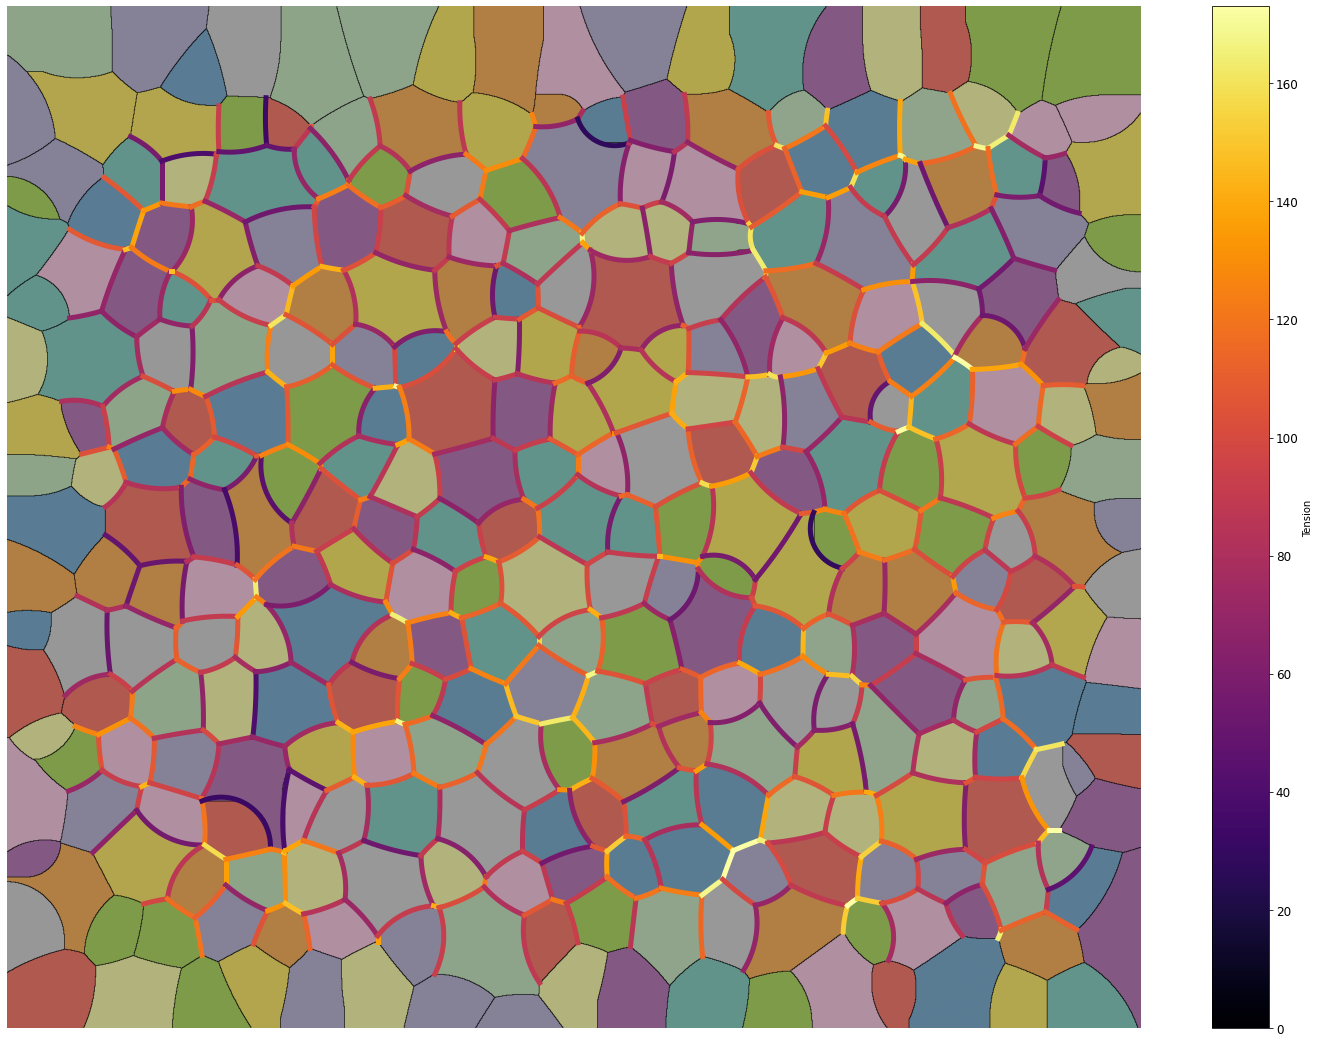

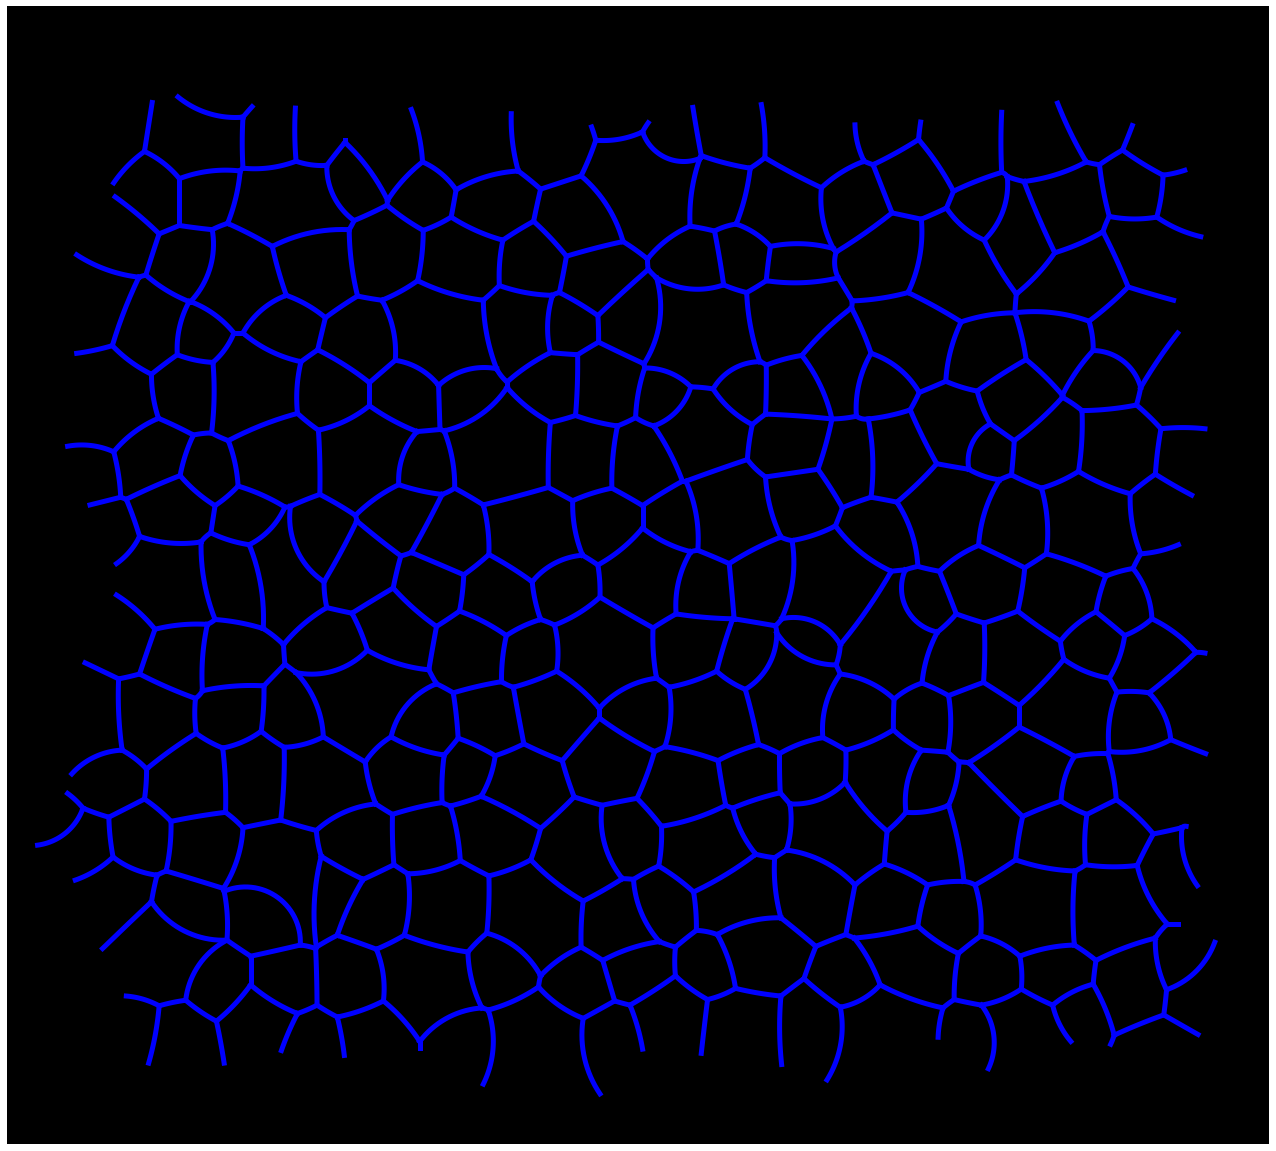

In [3]:
# Plot everything
tiling.plot(['tension','pressure','stress'], img_test)

# Plot tensions only
no_tiling.plot(['tension'], img_test)

# Plot CAP without background image
tiling.plot(['CAP'])

##### Analysing processed results

In [5]:
# Output to csv or pandas dataframe
results = no_tiling.output_results()
results

,pressure,eccentricity,perimeter,axis_major,axis_minor,feret_d,equiv_diam_area,orientation,area,centroid_x,...,stresstensor_anisotropy,inertiatensor_eigval1,inertiatensor_eigval2,inertiatensor_orientation,inertiatensor_anisotropy,moments_hu_1,moments_hu_2,moments_hu_3,bbox_x,bbox_y
14,1.368373,0.534477,328.249783,104.399629,88.236772,110.390217,95.3063,0.370778,7134,191.642697,...,0.571237,681.205155,486.607999,1.200019,0.699805,0.163697,0.000744,0.000116,88,108
15,0.637079,0.399578,413.605122,123.648777,113.348746,135.624482,115.547349,0.374883,10486,208.217242,...,0.569074,955.563751,802.996133,1.195913,0.542063,0.167706,0.000212,0.000741,110,135
16,0.803681,0.707845,400.516811,131.16888,92.653497,141.509717,108.600267,0.179695,9263,204.104934,...,0.757310,1075.329700,536.541902,1.391102,0.866627,0.174012,0.003383,0.000014,109,141
17,0.896751,0.727807,372.918831,123.798724,84.898981,135.473245,101.359607,0.824986,8069,205.296319,...,0.598029,957.882748,450.489810,0.745810,0.882508,0.174541,0.003954,0.000110,113,115
21,1.011606,0.665907,366.190909,120.594416,89.967576,128.514591,103.343763,1.410589,8388,235.793395,...,0.652196,908.938317,505.885292,0.160208,0.830803,0.168672,0.002309,0.000046,126,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,0.795830,0.701663,409.972655,132.0806,94.108639,144.585615,108.775986,0.137308,9293,1695.918433,...,0.923312,1090.330309,553.527242,1.433488,0.861552,0.176892,0.003337,0.000418,116,144
242,1.154391,0.588513,322.308658,103.219337,83.45155,112.485555,92.016536,0.560010,6650,1688.014737,...,0.739622,665.889475,435.260078,1.010786,0.756795,0.165586,0.001203,0.000070,90,96
244,0.662380,0.487263,457.570635,137.529787,120.098628,156.348969,126.030406,0.772191,12475,1686.440321,...,0.449356,1182.152642,901.480032,0.798605,0.646900,0.167025,0.000506,0.000200,154,136
245,1.004402,0.887647,400.759451,152.69124,70.318167,151.818971,100.634722,0.691905,7954,1715.305004,...,0.660618,1457.163427,309.040285,0.878891,0.977252,0.222052,0.020836,0.000805,120,131


<AxesSubplot:>

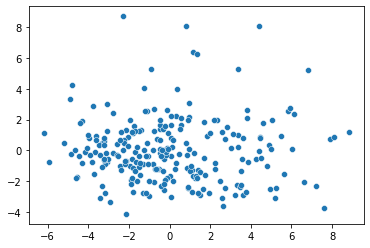

In [6]:
# Plot cells in morphology space
# PCA on morphology results
morph_res = results[['eccentricity','perimeter','axis_major','axis_minor','feret_d','equiv_diam_area','orientation',
                        'area','inertiatensor_eigval1','inertiatensor_eigval2','inertiatensor_orientation',
                        'inertiatensor_anisotropy','moments_hu_1','moments_hu_2','moments_hu_3','bbox_x','bbox_y']].to_numpy()
morph_res_norm = scale(morph_res)

morph_pca = PCA()
morph_pca_res = morph_pca.fit_transform(morph_res_norm)

sns.scatterplot(morph_pca_res[:,0], morph_pca_res[:,1])

<AxesSubplot:>

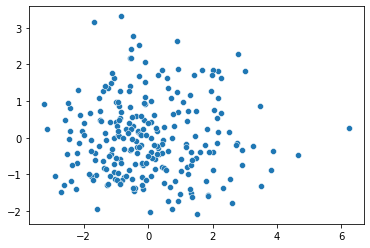

In [7]:
# Plot cells in force space
# PCA on force inference results
force_res = results[['pressure','stresstensor_eigval1','stresstensor_eigval2','stresstensor_orientation','stresstensor_anisotropy']].to_numpy()
force_res_norm = scale(force_res)

force_pca = PCA()
force_pca_res = force_pca.fit_transform(force_res_norm)

sns.scatterplot(force_pca_res[:,0], force_pca_res[:,1] )

### Manually run pipeline without tiling

##### Load and segment image (experimental, not fully implemented)

<tifffile.TiffFile 'MMStack_Pos38.ome.tif'> OME series is BinaryOnly, not an OME-TIFF master file 


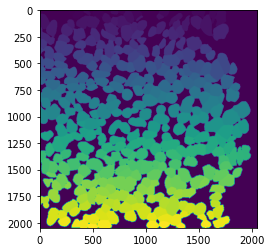

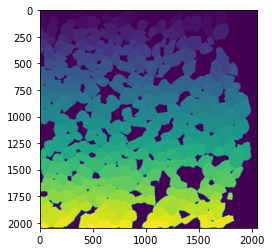

In [14]:
# Read image
img_seg = skimage.io.imread('./Images/MMStack_Pos38.ome.tif')
img_seg = np.stack([img_seg[0,:,:,1],img_seg[4,:,:,3],np.zeros([img_seg.shape[1], img_seg.shape[2]])], axis=-1)

# Segment using default 'Cyto2' model
seg = Segmenter(images=img_seg, labelled=True)
segmented_image = seg.segment_image(channels=[1,2])

plt.figure()
plt.imshow(segmented_image)

# Segment using custom model
seg = Segmenter(images=img_seg, labelled=True)
segmented_image_custom = seg.segment_image(channels=[1,2], use_model='custom')

plt.figure()
plt.imshow(segmented_image_custom)

##### Process segmented image

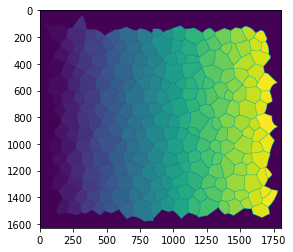

In [8]:
seg = Segmenter(masks=img_test, labelled=True)
VMSI_obj, labelled_mask = seg.process_segmented_image()

plt.imshow(labelled_mask)

##### Infer tensions and stress


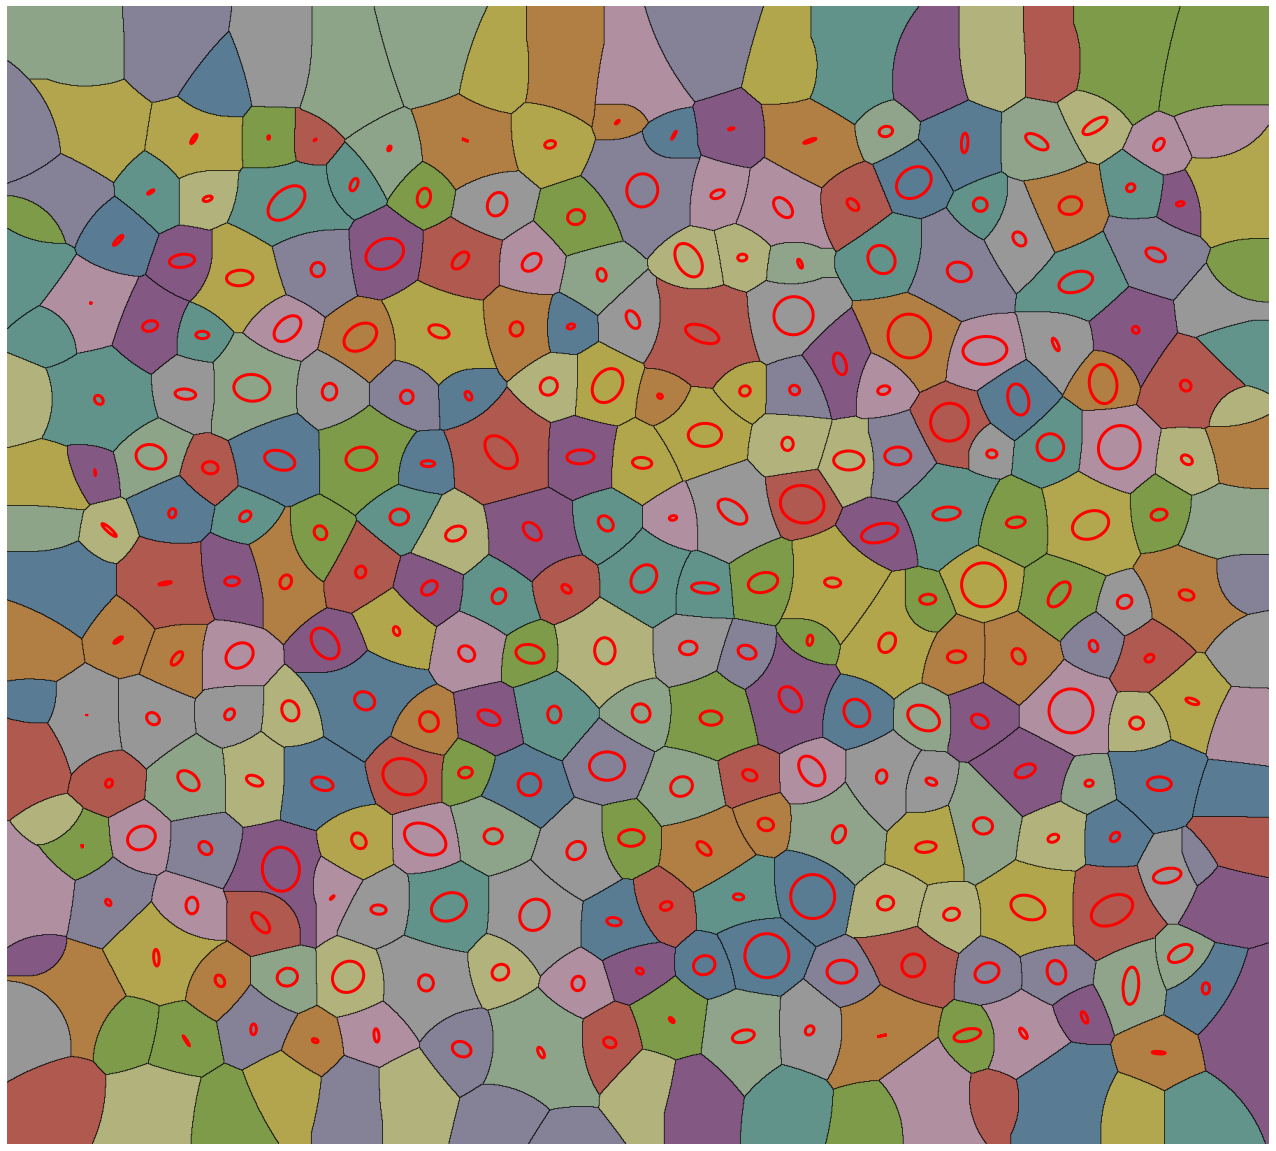

In [9]:
V_df = VMSI_obj.V_df
C_df = VMSI_obj.C_df
E_df = VMSI_obj.E_df

# create the model
model = VMSI(vertices=V_df, cells=C_df, edges=E_df, height=img_test.shape[0], width=img_test.shape[1], verbose=False)

# fit the model parameters
model.fit()

# compute stress tensor
model.compute_stresstensor()

# plot results
model.plot(['stress'], img_test)